<a href="https://colab.research.google.com/github/LuccaDC/2o-Trabalho-de-Intelig-ncia-Artificial-Experimento-de-Aprendizado-N-o-Supervisionado/blob/main/2o_Trabalho_Experimento_de_Aprendizado_N%C3%A3o_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2o Trabalho: Experimento de Aprendizado Não-Supervisionado**
Lucca Dourado Cunha - 22051490

### Dependencias

In [1]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=3704a93e4745d1ca5b03e0539d6894979b629662aa62f3e2fa6cf7d26950a056
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built MiniSom


In [2]:
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from minisom import MiniSom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

Importação do dataset. (Se espera o arquivo csv na pasta raiz)

In [3]:
data= pd.read_csv("StartUpsESG_0602 - StartUp_RaisedBy_ICOs.csv", decimal=',')
data.head()

,id,StartUp,Country,Year,ESG,E,S,G,Raised,distr_tk,...,FISCALFRD,FINACIFRD,FOREIGINVEST,FOREIGDP,INTERPAY,percmath,GINI,MAKTEFF,PERCTECH,DEVCOUNT
0,12316,VenusEnergy,Lithuania,2018,0.010,0.008,0.002,0.000,5986183.0,0.27,...,96.7,70,1.299842e+09,2.420713,3.476571,4.26941,35.7,4.642995,3.11263,1
1,23416,GreenEnergyCoin,Netherlands,2018,0.018,0.010,0.006,0.002,0.0,0.00,...,88.2,80,-3.614670e+11,-39.565294,2.264509,6.37706,28.1,5.408080,2.82506,1
2,1553,HydroMiner,Austria,2017,0.014,0.010,0.000,0.004,3500000.0,0.00,...,81.1,70,-2.855524e+10,-6.277635,3.644302,6.07867,30.8,4.897589,4.38647,1
3,17028,PowerCorp,"Hong Kong SAR, China",2018,0.008,0.006,0.000,0.002,0.0,0.00,...,100.0,90,9.703626e+10,26.828457,0.050000,0.00000,0.0,5.705542,0.00000,1
4,8483,Emyron Coin,United States,2018,0.017,0.000,0.011,0.006,0.0,0.28,...,54.8,80,2.614820e+11,1.268600,11.816379,7.20920,41.4,5.209139,3.78213,1


## Tratamento do Dataset

Aqui separamos os valores numéricos dos valores String do dataset para permitir a análise do mesmo pelo código. Os dados string são salvos em variáveis a parte(startup, countries e raised) para serem utilizados em análises futuras.

Além realizamos o dimensionamento dos dados numericos para treinamento, separando os mesmos dos dados categóricos do dataset.

Como algumas tranformações são feitas no meio do processo de treinamento algumas cópias (featureData e PCAData) são feitas para a geração de gráficos e outras análises.

In [4]:
startup=data["StartUp"]
countries=data["Country"]
raised=data["Raised"]

data = data.drop(["StartUp", "Country", "Year", "id"], axis=1)

In [5]:
cater = data[[" DMED ", " DMEDIA ", " DEVCOUNT ", " platform ETHEREUM ", " kyc ", " whitelist ", " mvp ", " retrictions USD ", " FIAT "]]
numer = data.drop([" DMED ", " DMEDIA ", " DEVCOUNT ", " platform ETHEREUM ", " kyc ", " whitelist ", " mvp ", " retrictions USD ", " FIAT "], axis=1)

numer_columns = numer.columns
sc = MinMaxScaler(feature_range = (0, 1))
numer = pd.DataFrame(sc.fit_transform(numer), columns = numer_columns)
data = pd.concat([numer, cater], axis=1, join='inner')

featureData = data
PCAData = data

In [6]:
data.head()

,ESG,E,S,G,Raised,distr_tk,Rating,teamsize,duracao,EPI,...,PERCTECH,DMED,DMEDIA,DEVCOUNT,platform ETHEREUM,kyc,whitelist,mvp,retrictions USD,FIAT
0,0.166667,0.100,0.033333,0.000000,0.005986,0.27,0.78,0.166667,0.001919,0.693031,...,0.220783,1,0,1,0,0,0,0,1,0
1,0.300000,0.125,0.100000,0.033333,0.000000,0.00,0.00,0.000000,0.000000,0.887236,...,0.200385,1,1,1,1,0,0,0,0,0
2,0.233333,0.125,0.000000,0.066667,0.003500,0.00,0.00,0.075758,0.001582,0.954581,...,0.311138,1,1,1,1,0,0,1,0,0
3,0.133333,0.075,0.000000,0.033333,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,1,1,1,0,0,0,0,0,0
4,0.283333,0.000,0.183333,0.100000,0.000000,0.28,0.48,0.015152,0.001624,0.793265,...,0.268272,1,1,1,1,0,0,0,0,0


##Encontrando o número de clusters adequados para o dataset

Utilizando o Elbow Method, verificamos baseado no dataset qual é o número otimizado de clusters que devemos utilizar

Como saída ele nos apresenta o gráfico abaixo, ele nos indica que tanto 2 como 3 são valores próximos e adequados para o dataset.

Para este trabalho utilizaremos um total de 3 clusters mas tendo em mente que, como apresentado pelo Elbow Method aqui, 2 desses clusters são próximos o suficiente que poderiam ser interpretados como um único cluster, e isso é algo que devemos levar em consideração nas interpretações finais.

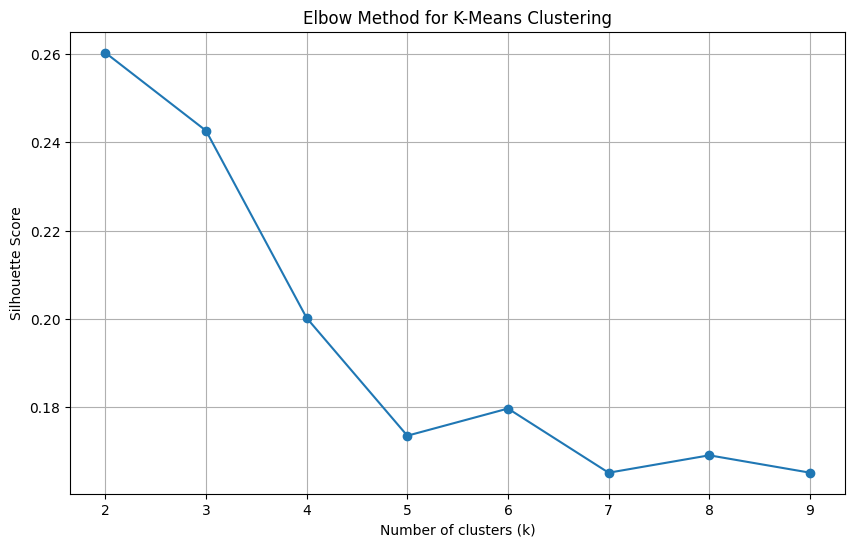

In [7]:
# Define the range of clusters to explore
k_range = range(2, 10)

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Calculate silhouette score for each k value in the range
for k in k_range:
    # Create a KMeans object with the current k
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    # Fit the model to the data
    kmeans.fit(data)
    # Calculate the silhouette score
    silhouette_score_ = silhouette_score(data, kmeans.labels_)
    # Append the score to the list
    silhouette_scores.append(silhouette_score_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for K-Means Clustering')
plt.grid(True)
plt.show()

## Primeiros gráficos

Aqui realizaremos um treinamento mais focado na visualização mais branda desses dados, por isso utilizaremos coordenadas reduzidas e diretamente ligadas a quantidade de clusters.

In [8]:
data = data.values

In [9]:
# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.1, learning_rate=.5)

som.train_batch(data, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.7045707815753877


Nessa primeira representação gráfica tentamos mapear os dados de cada um dos 3 neuronios do SOM como um cluster diferente e traduzindo suas coordenadas.

Como podemos ver não tivemos sucesso com essa representação pois os dados ficaram muito próximos e não é possível tirar uma análise disto.

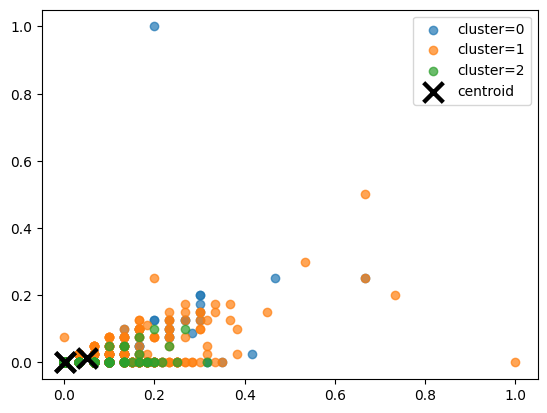

In [10]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, [1,3])

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=5, linewidths=20, color='k', label='centroid')
plt.legend();

Em seguida apenas separamos os diferentes clusters pela area do gráfico para se ter uma ideia da dispersão dos dados entre os clusters.

Mas não há muito que se tirar dessa representação também.

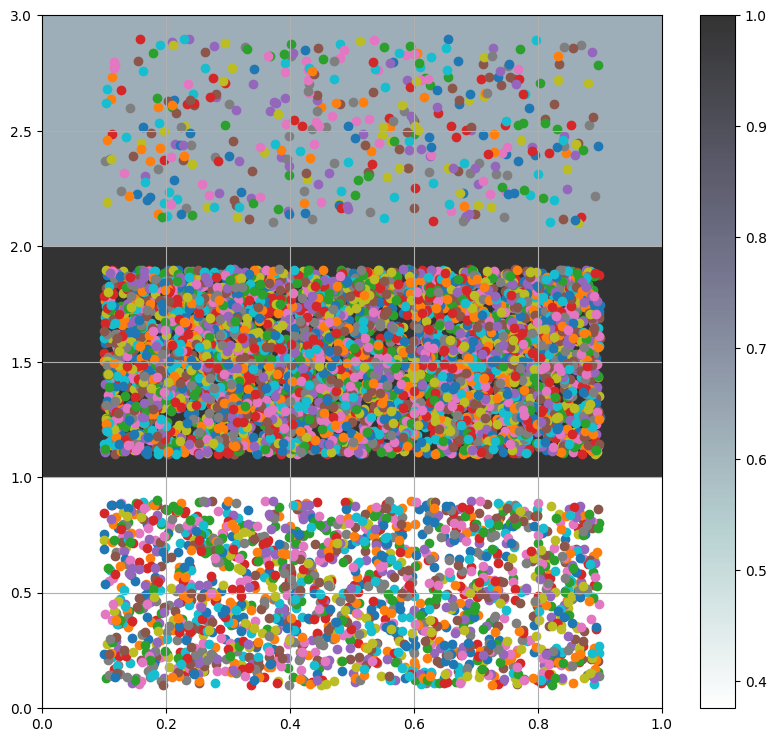

In [11]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.8)
plt.colorbar()

for c in np.unique(startup):
    idx_target = startup==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8)
plt.grid()
plt.show()

## Estudo dos parametros do Dataset

Neste trecho tentaremos entender quais colunas do dataset são mais importantes e tem maior influencia durante o treinamento, além de analises adicionais na mesma temática.

Realizamos um novo treinamento agora com coordenadas maiores para fazer a analise. Como um bonus geramos um grafico de evolução do erro no treinamento que estava utilizando nos testes e resolvi deixar.

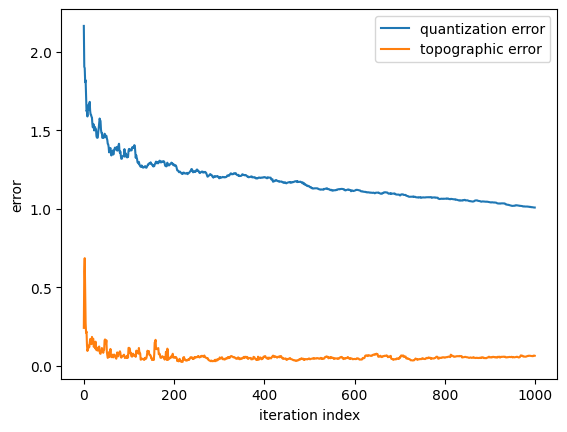

In [12]:
som = MiniSom(15, 15, data.shape[1], sigma=3., learning_rate=.7,
              neighborhood_function='gaussian', random_seed=10)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

Aqui tratamos os dados da forma que precisaremos e criaremos as variáveis necessárias (inclusive mais a frente como é o caso da feature_names).

In [13]:
feature_names = list(featureData.columns)

X = featureData[feature_names].values
X = scale(X)

feature_df = pd.DataFrame(X, columns=feature_names)
target = feature_df.iloc[:,0]
Features = feature_df.iloc[:,1:]

Aqui geramos primeiramente um gráfico de correlações dos atributos do Dataset.

Podemos visualizar que nosso dataset possui "grupos" de atributos que se correlacionam entre si, podemos percebe-los na forma desses quadrados de cores mais quentes.

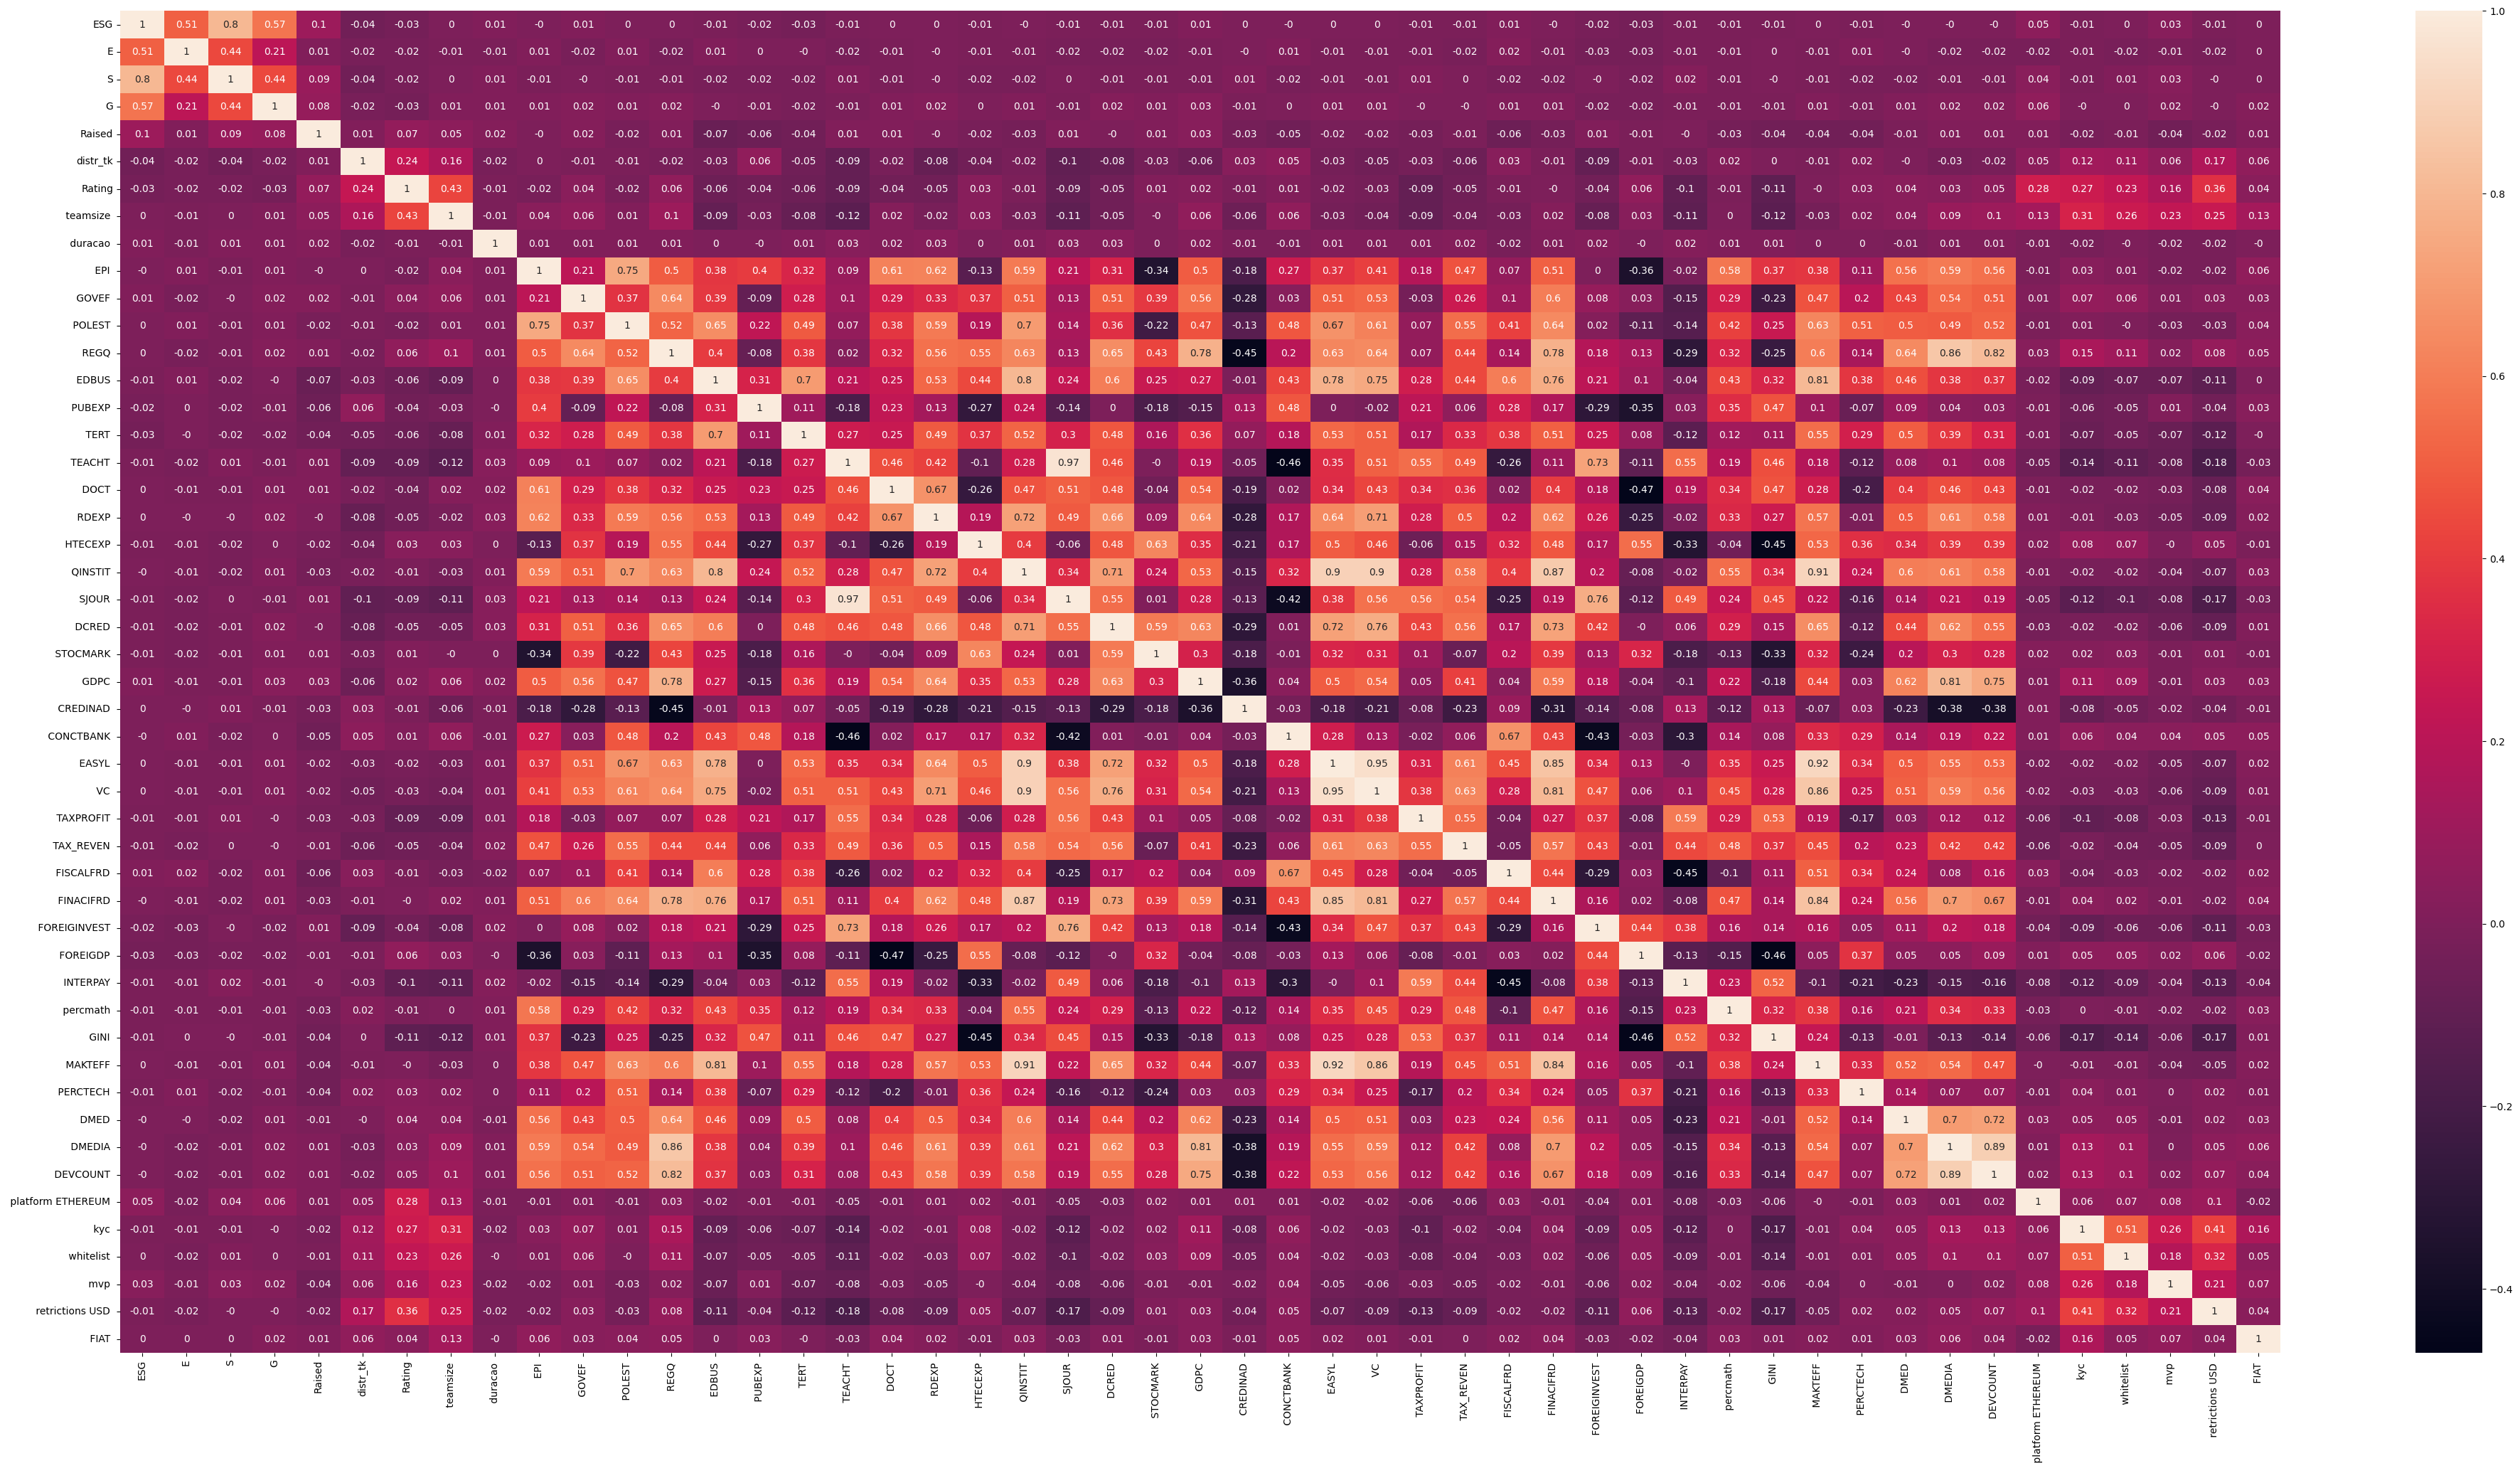

In [14]:
import seaborn as sn

feat_num = len(feature_names)

plt.figure(figsize=(feat_num,feat_num/2))
corrMatrix = feature_df.corr().round(2)
sn.heatmap(corrMatrix, annot=True)

# plt.tight_layout()

plt.show()

Novamente temos abaixo uma representação da correlação dos atributos. Dessa vez podemos fazer uma analise mais visual, visto que os gráficos que mais se assemelham são os que tem mais correlação entre si.

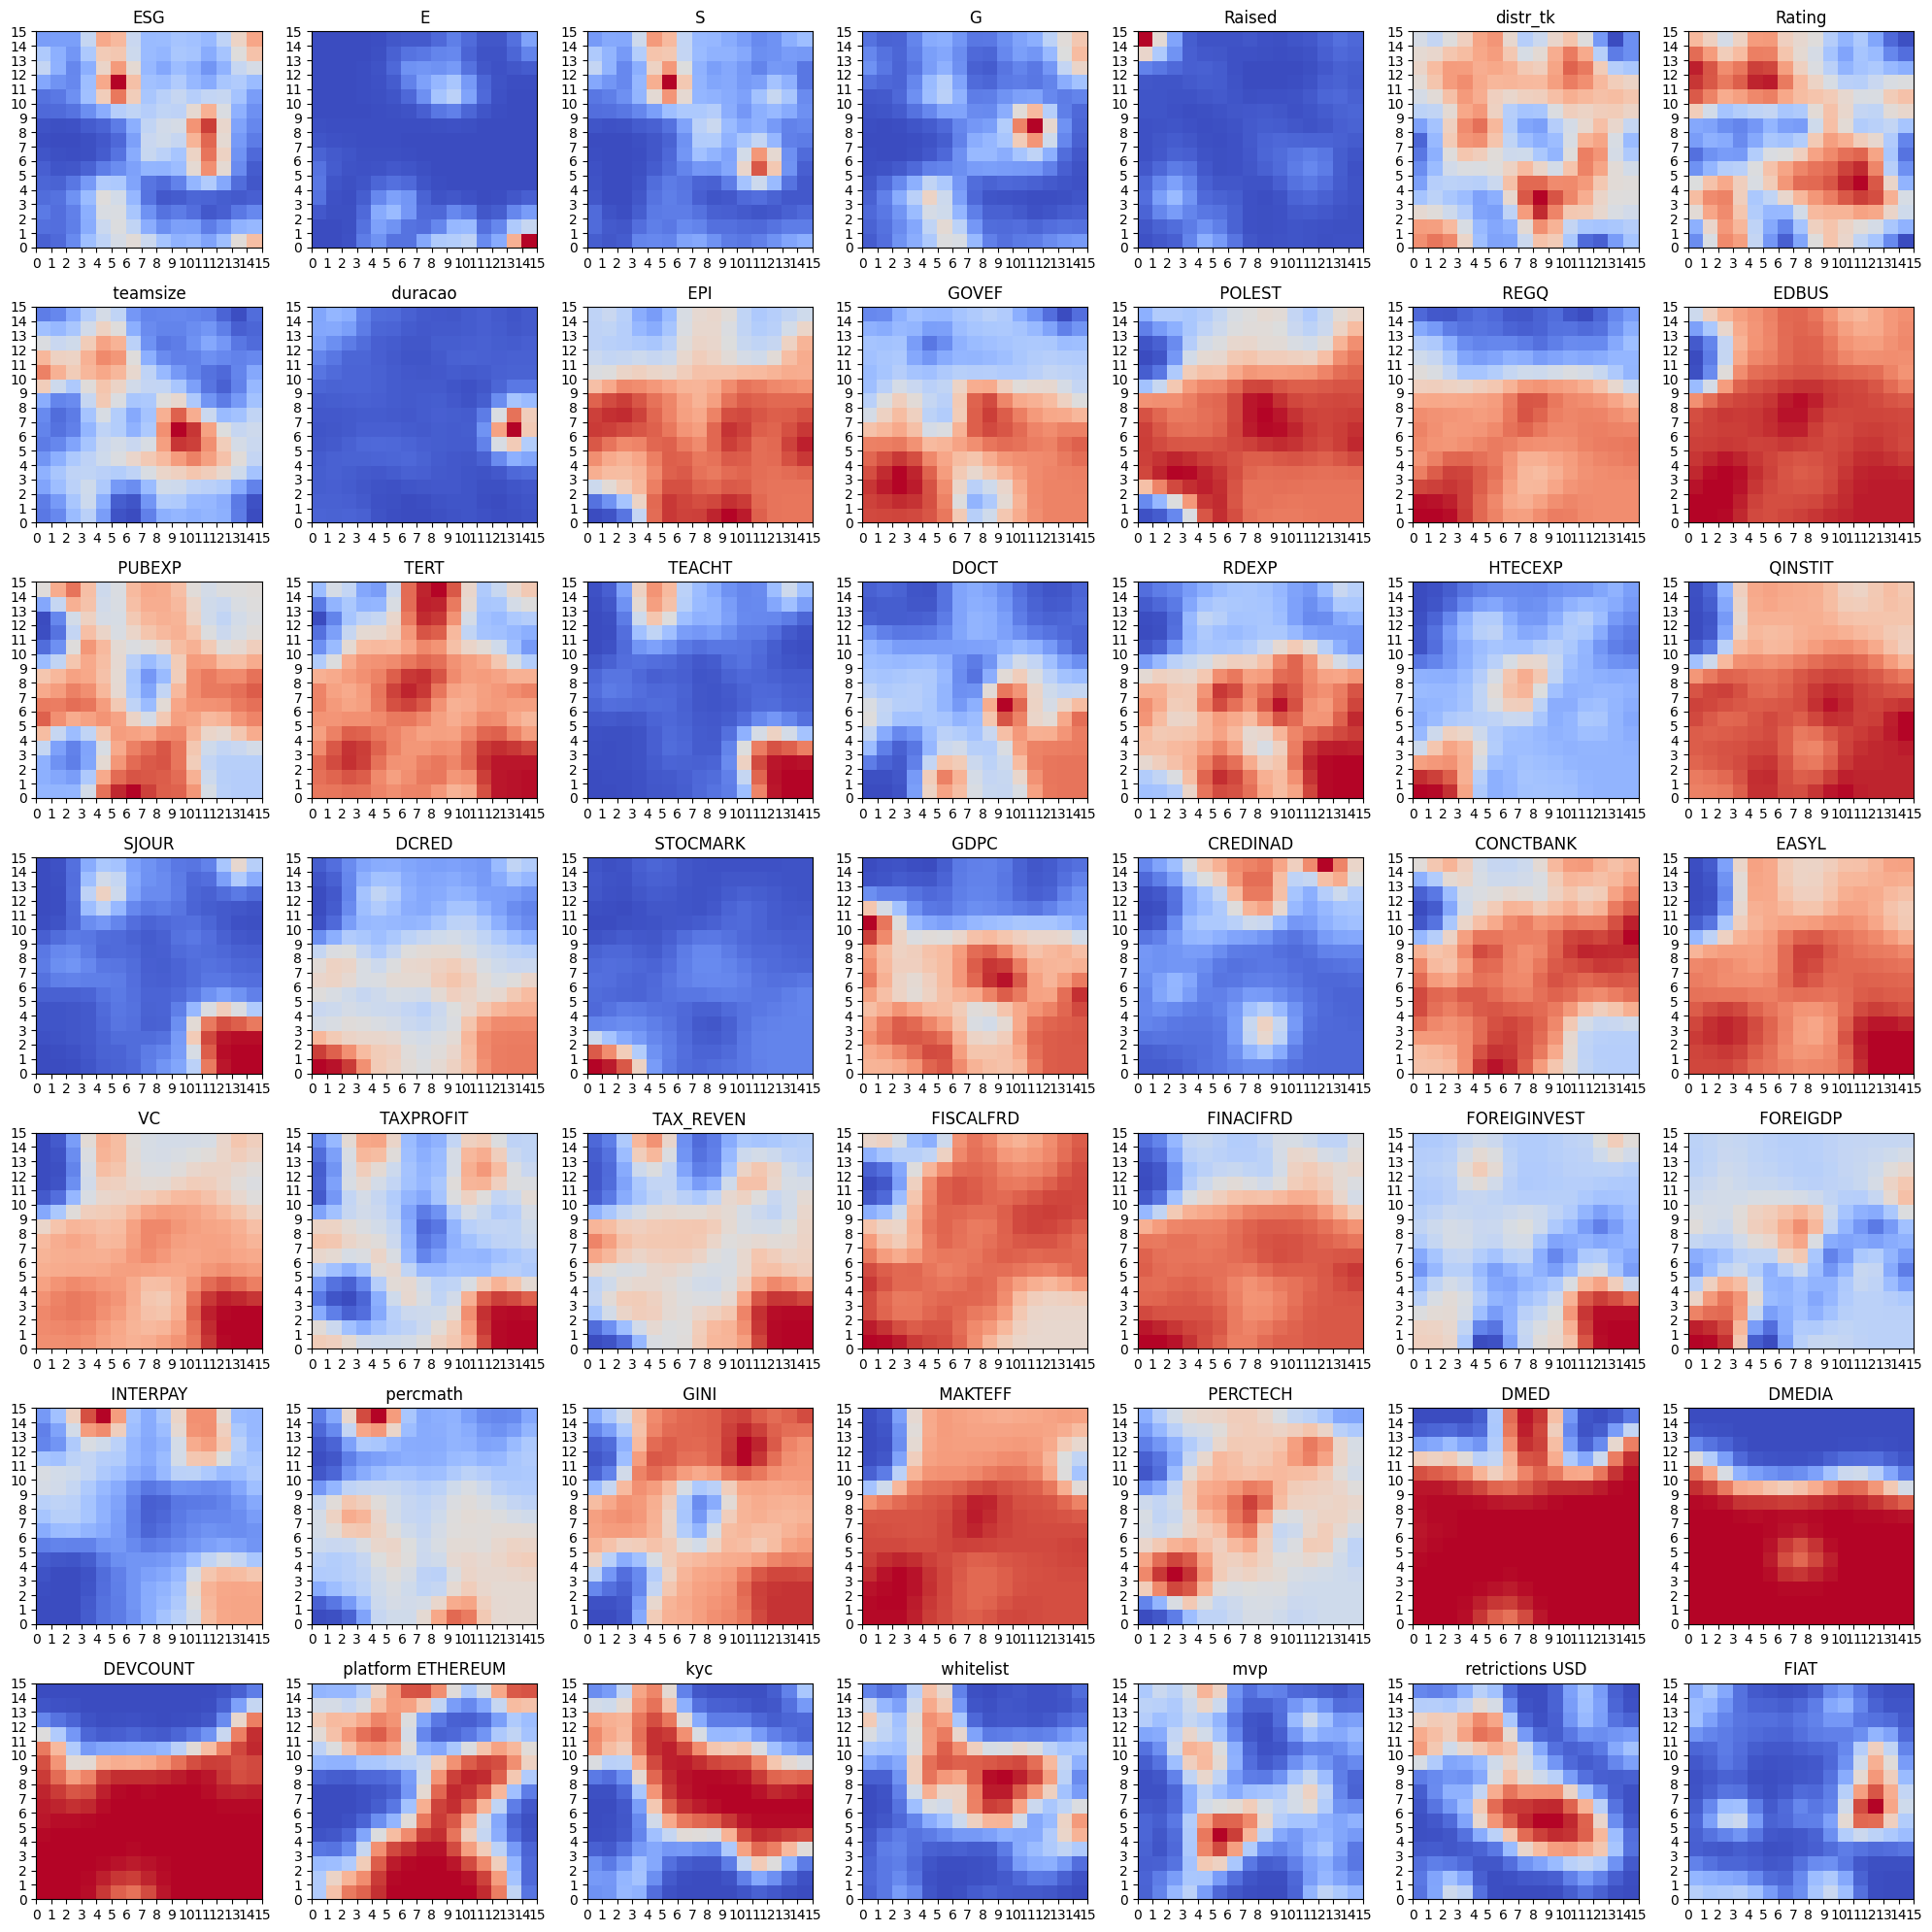

In [15]:
W = som.get_weights()
plt.figure(figsize=(20, 20))
for i, f in enumerate(feature_names):
    plt.subplot(7, 7, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(15+1))
    plt.yticks(np.arange(15+1))
plt.tight_layout()
plt.show()

Por fim pedimos diretamente ao modelo quais das features mais importantes na hora da decisão da divisão dos dados entre os clusters.

Os valores do ESG como esperado se encontram liderando o ranking. Mas como surpresas vemos como os valores de Raised pouco importaram na classificação e como o MAKTEFF se mostrou bastante importante também entre o restante que não seja o ESG score.

[ 1.14502732e-01  7.26953640e-01  1.08719614e-01  3.25667038e-04
  6.68560229e-03  1.49543973e-03  1.90453382e-04  2.35127632e-04
  4.33222662e-04  2.55735877e-04  1.18134112e-17  1.22182394e-04
  8.17683059e-04  1.90100870e-18  1.93980296e-04  5.29037172e-05
  4.70255264e-05  3.69767891e-03  2.44532737e-04  4.61673540e-18
 -4.07359006e-19  9.92815121e-04  1.62943602e-18  1.78189862e-04
  8.23828440e-03  1.77401126e-03  1.41076579e-04  1.57673824e-04
  1.96890186e-18  0.00000000e+00  2.64518586e-05  2.11614869e-04
  3.44461981e-03  1.00768985e-04  3.34116365e-03  3.52691448e-05
  5.29037172e-05  1.59933523e-02  4.70255264e-05  0.00000000e+00
  1.08629068e-18  3.39465838e-19  0.00000000e+00  4.70255264e-05
  1.15418385e-18  1.88102105e-04  5.64306316e-05  0.00000000e+00]


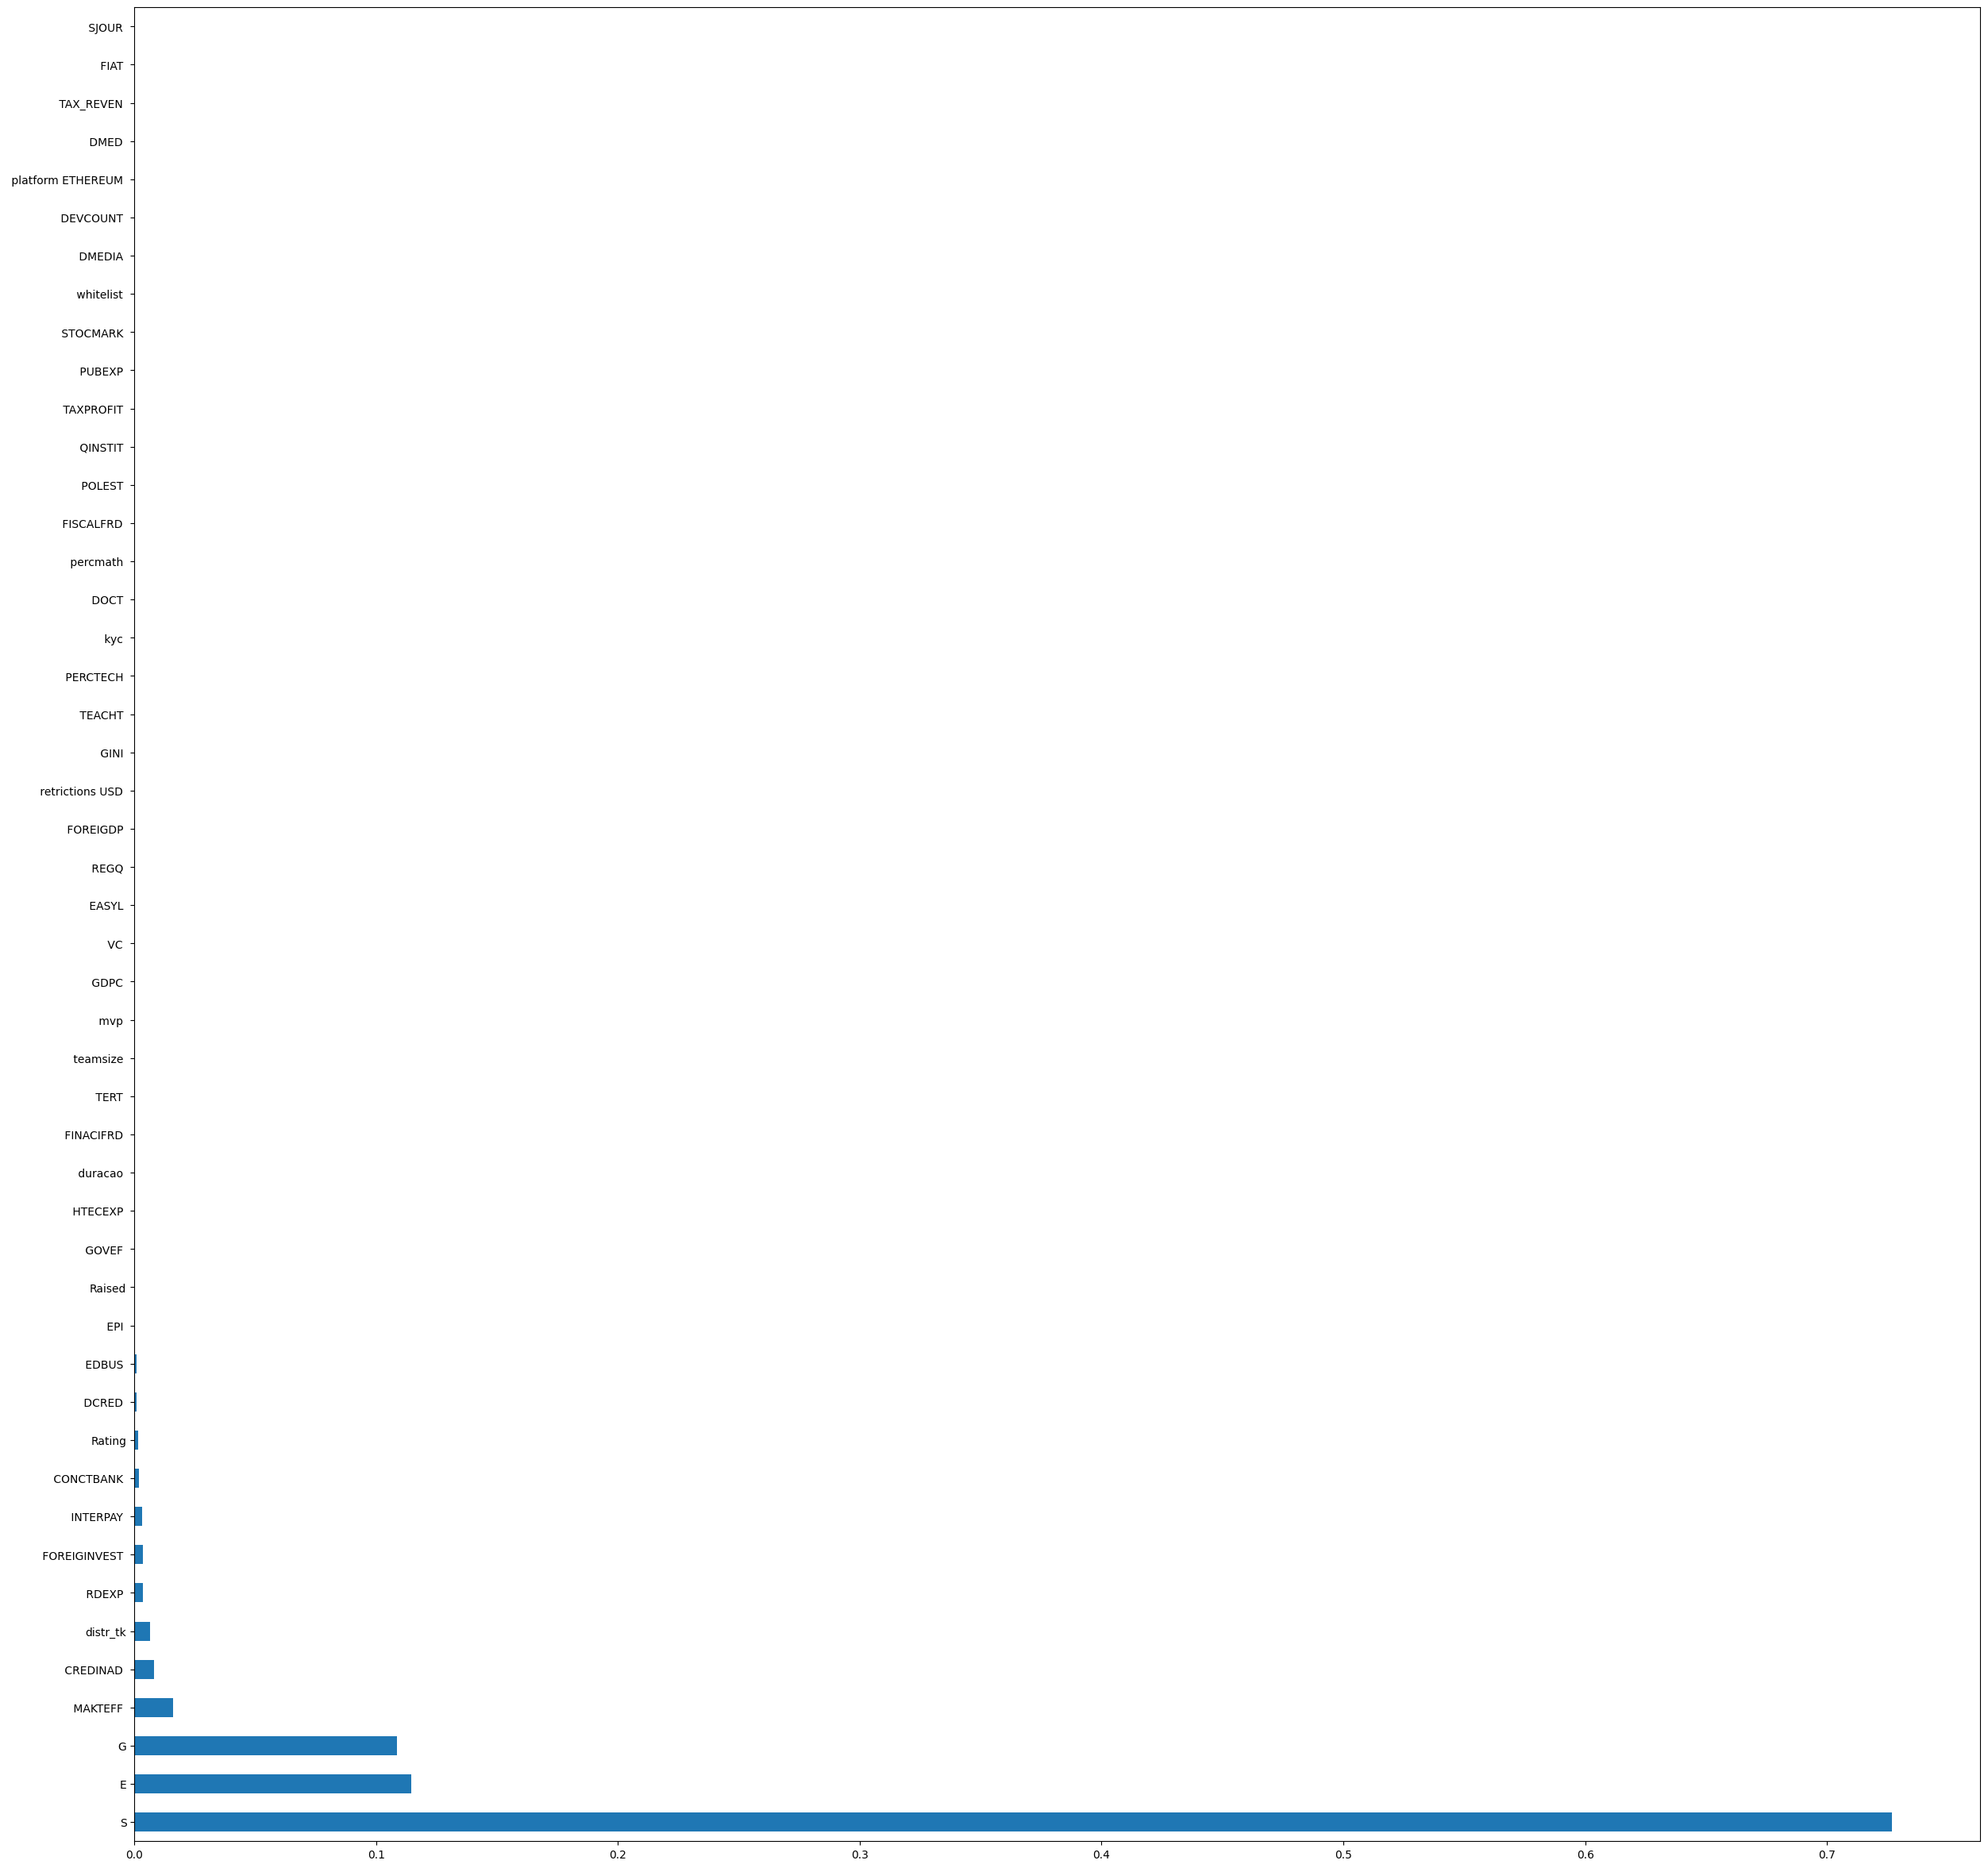

In [16]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(Features, target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Features.columns)
feat_importances.nlargest(Features.shape[1]).plot(kind='barh', figsize=(30,30))
plt.show()

## Visualização de High Dimension Clusters

Aplicamos alguns dos métodos do Visualizing High Dimensional Clusters para melhor visualização dos dados. Método escolhido para implementação foi o Principal Component Analysis (PCA)

Aqui declaramos como anteriormente estipulado 3 clusters para serem gerados.

In [17]:
kmeans = KMeans(n_clusters=3)

De resto preparamos o dataset que estava separado especialmente para essa parte.

In [18]:
kmeans.fit(PCAData)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [19]:
clusters = kmeans.predict(PCAData)

In [20]:
PCAData["Cluster"] = clusters

PCA

In [21]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
plotX = pd.DataFrame(np.array(PCAData.sample(5000)))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = PCAData.columns

In [22]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [23]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [24]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [25]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [26]:
plotX["dummy"] = 0

In [27]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

In [28]:
#This is needed so we can display plotly plots properly
init_notebook_mode(connected=True)

Representação unidimensional dos clusters

In [29]:
#Instructions for building the 1-D plot

pio.renderers.default = 'colab'

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

Representação bidimensional dos clusters

In [30]:
#Instructions for building the 2-D plot

pio.renderers.default = 'colab'

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

Representação triidimensional dos clusters

In [31]:
#Instructions for building the 3-D plot

pio.renderers.default = 'colab'

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)


A partir desses gráficos percebemos que, como anteriormente citado na decisão da quantidade de clusters, os clusters 0 e 2 poderiam muito bem ser tanto unificados como se manter dessa forma. É importante então que entedamos o por que dessa possibilidade existir em meio ao nosso dataset, e é isso que veremos em sequencia.

## Análises finais

Aqui por fim realizaremos compilações de gráficos e tabelas para chegar a uma conclusão sobre características principais de cada cluster e quais fatores foram predominantes na hora de separar os clusters.

### Countries

Primeiramente retornamos a coluna dos países ao dataset para ser utilizada na análise

In [32]:
data = pd.concat([countries, featureData], axis=1, join='inner')
data.head()

,Country,ESG,E,S,G,Raised,distr_tk,Rating,teamsize,duracao,...,DMED,DMEDIA,DEVCOUNT,platform ETHEREUM,kyc,whitelist,mvp,retrictions USD,FIAT,Cluster
0,Lithuania,0.166667,0.100,0.033333,0.000000,0.005986,0.27,0.78,0.166667,0.001919,...,1,0,1,0,0,0,0,1,0,2
1,Netherlands,0.300000,0.125,0.100000,0.033333,0.000000,0.00,0.00,0.000000,0.000000,...,1,1,1,1,0,0,0,0,0,2
2,Austria,0.233333,0.125,0.000000,0.066667,0.003500,0.00,0.00,0.075758,0.001582,...,1,1,1,1,0,0,1,0,0,2
3,"Hong Kong SAR, China",0.133333,0.075,0.000000,0.033333,0.000000,0.00,0.00,0.000000,0.000000,...,1,1,1,0,0,0,0,0,0,2
4,United States,0.283333,0.000,0.183333,0.100000,0.000000,0.28,0.48,0.015152,0.001624,...,1,1,1,1,0,0,0,0,0,0


Em sequencia separamos quais países estão presentes em cada cluster.

Assim, porém, fica difícil de analisar portanto na sequencia veremos outra representação mas agora graficamente.

In [33]:
data = pd.concat([countries, featureData], axis=1, join='inner')
# Get cluster labels for each startup
cluster_labels = kmeans.labels_

for cluster in np.unique(cluster_labels):
    # Get the indices of startups in the current cluster
    cluster_indices = np.where(cluster_labels == cluster)[0]
    # Extract original country names for the startups in the cluster
    cluster_countries = data.loc[cluster_indices, "Country"].tolist()
    print(f"Cluster {cluster}:", ", ".join(cluster_countries))

Cluster 0: United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States, United States,

Aqui podemos ver informações bastante inteiressantes e claramente chegar a conclusões sobre a seleção desses países para cada cluster.

Podemos perceber que um fator que se destaca é a diferença economica entre os países. Enquanto os clusters 0 e 2 possuem países economicamente fortes, o cluster 1 tem em pelo menos grande parte de sua composição países emergentes e subdesenvolvidos economicamente.

Este fator economico se mostra bastante importante tendo em vista que estamos trabalhando com startups.

Percebemos também como informado anteriormente que os clusters 0 e 2 poderiam ser um único cluster já que por essa análise eles encaixariam no mesmo grupo.

Destaque também para o cluster 0 que apresentou startups exclusivamente estadunidenses em seus dados.

Cluster 2: 31 unique countries
Cluster 0: 1 unique countries
Cluster 1: 81 unique countries


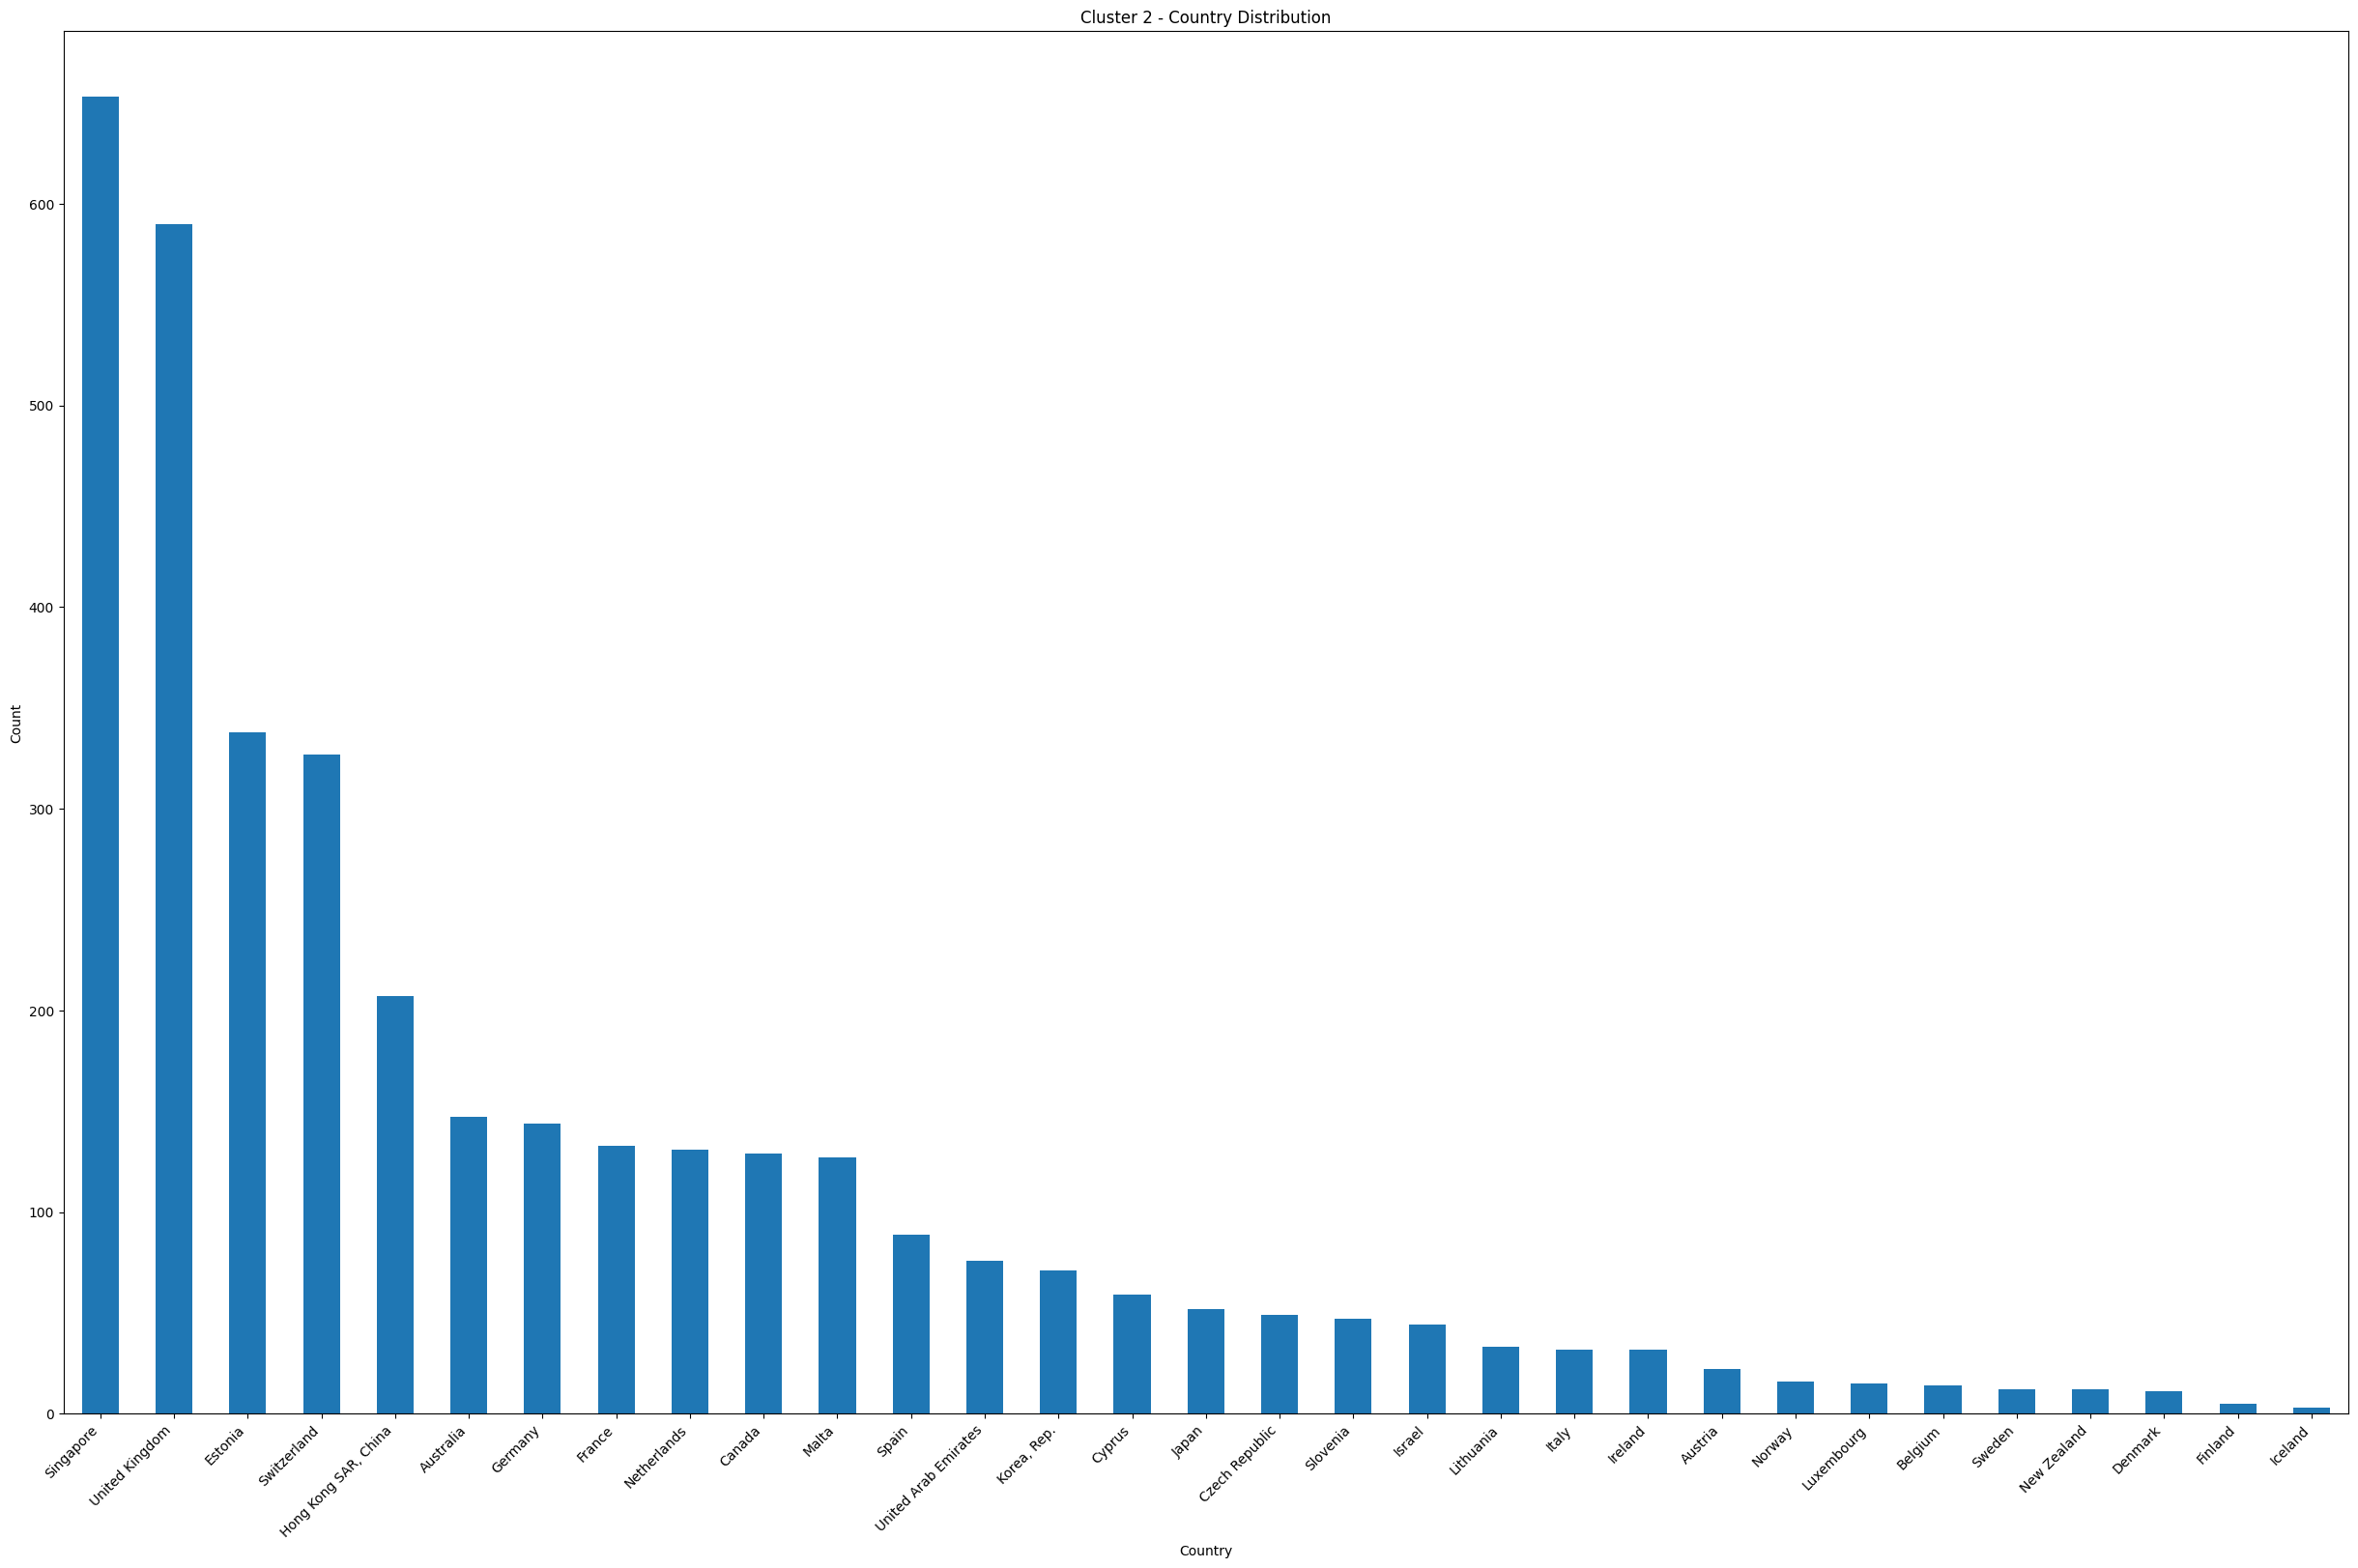

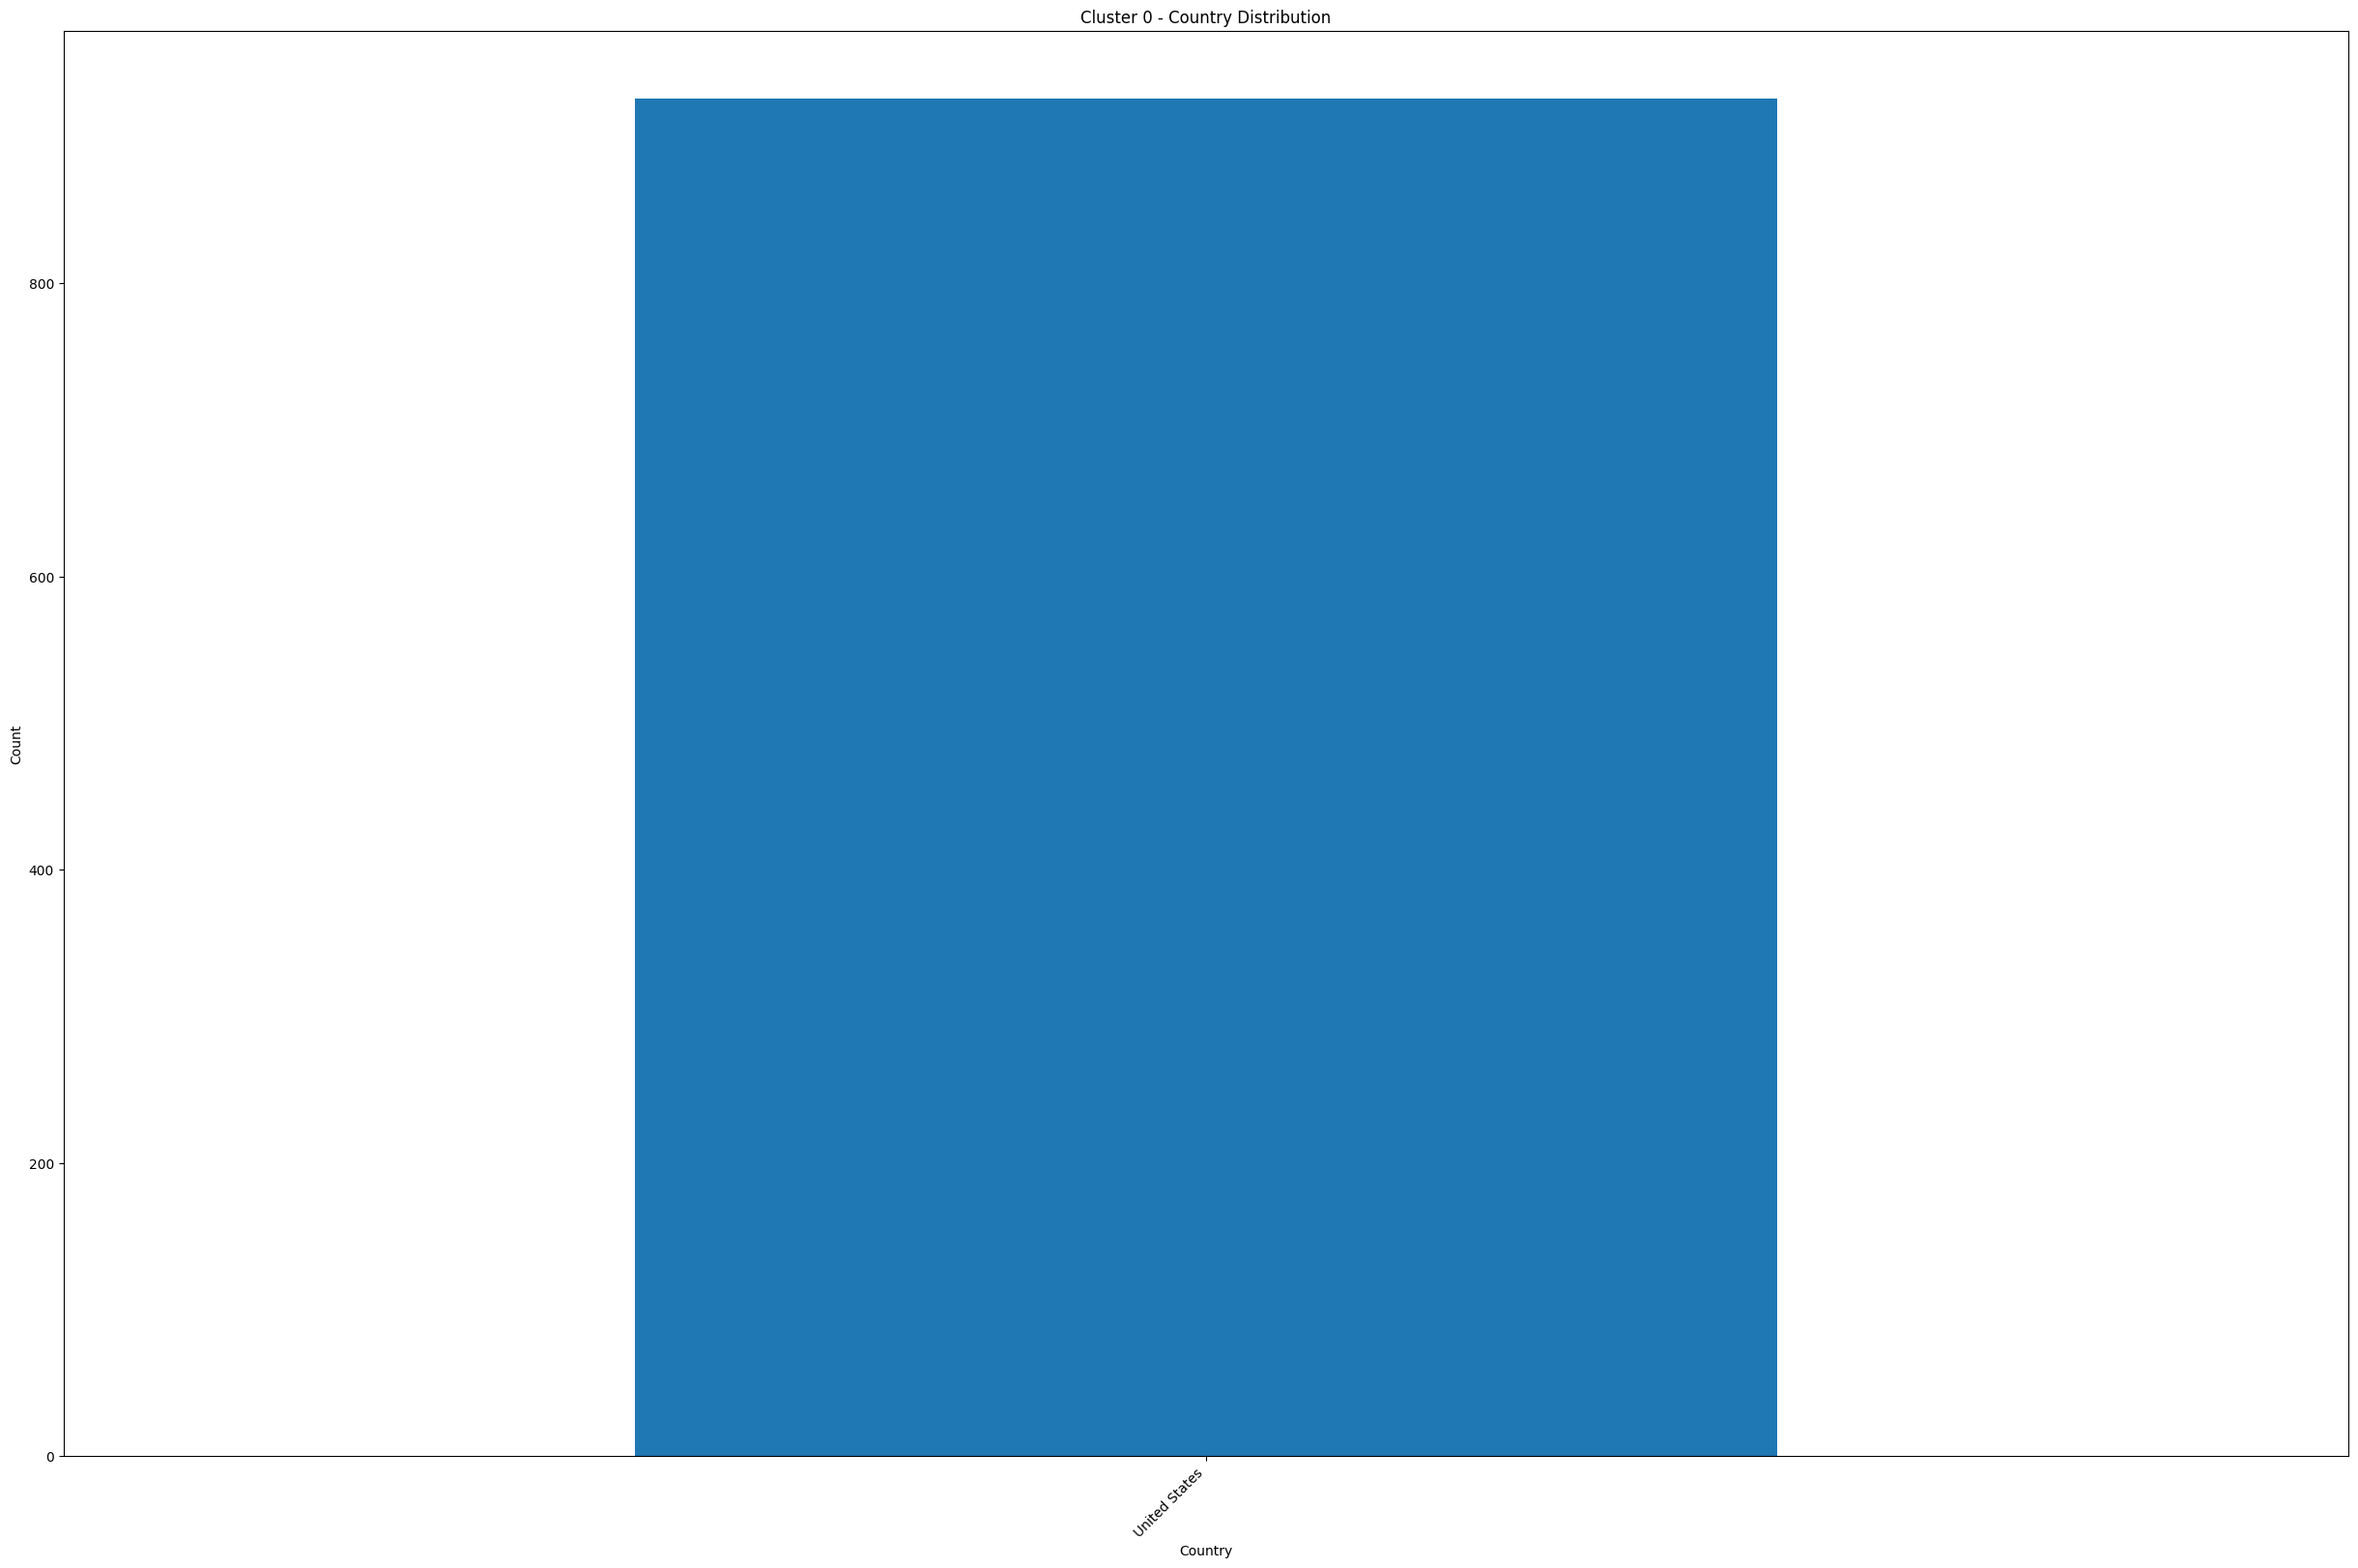

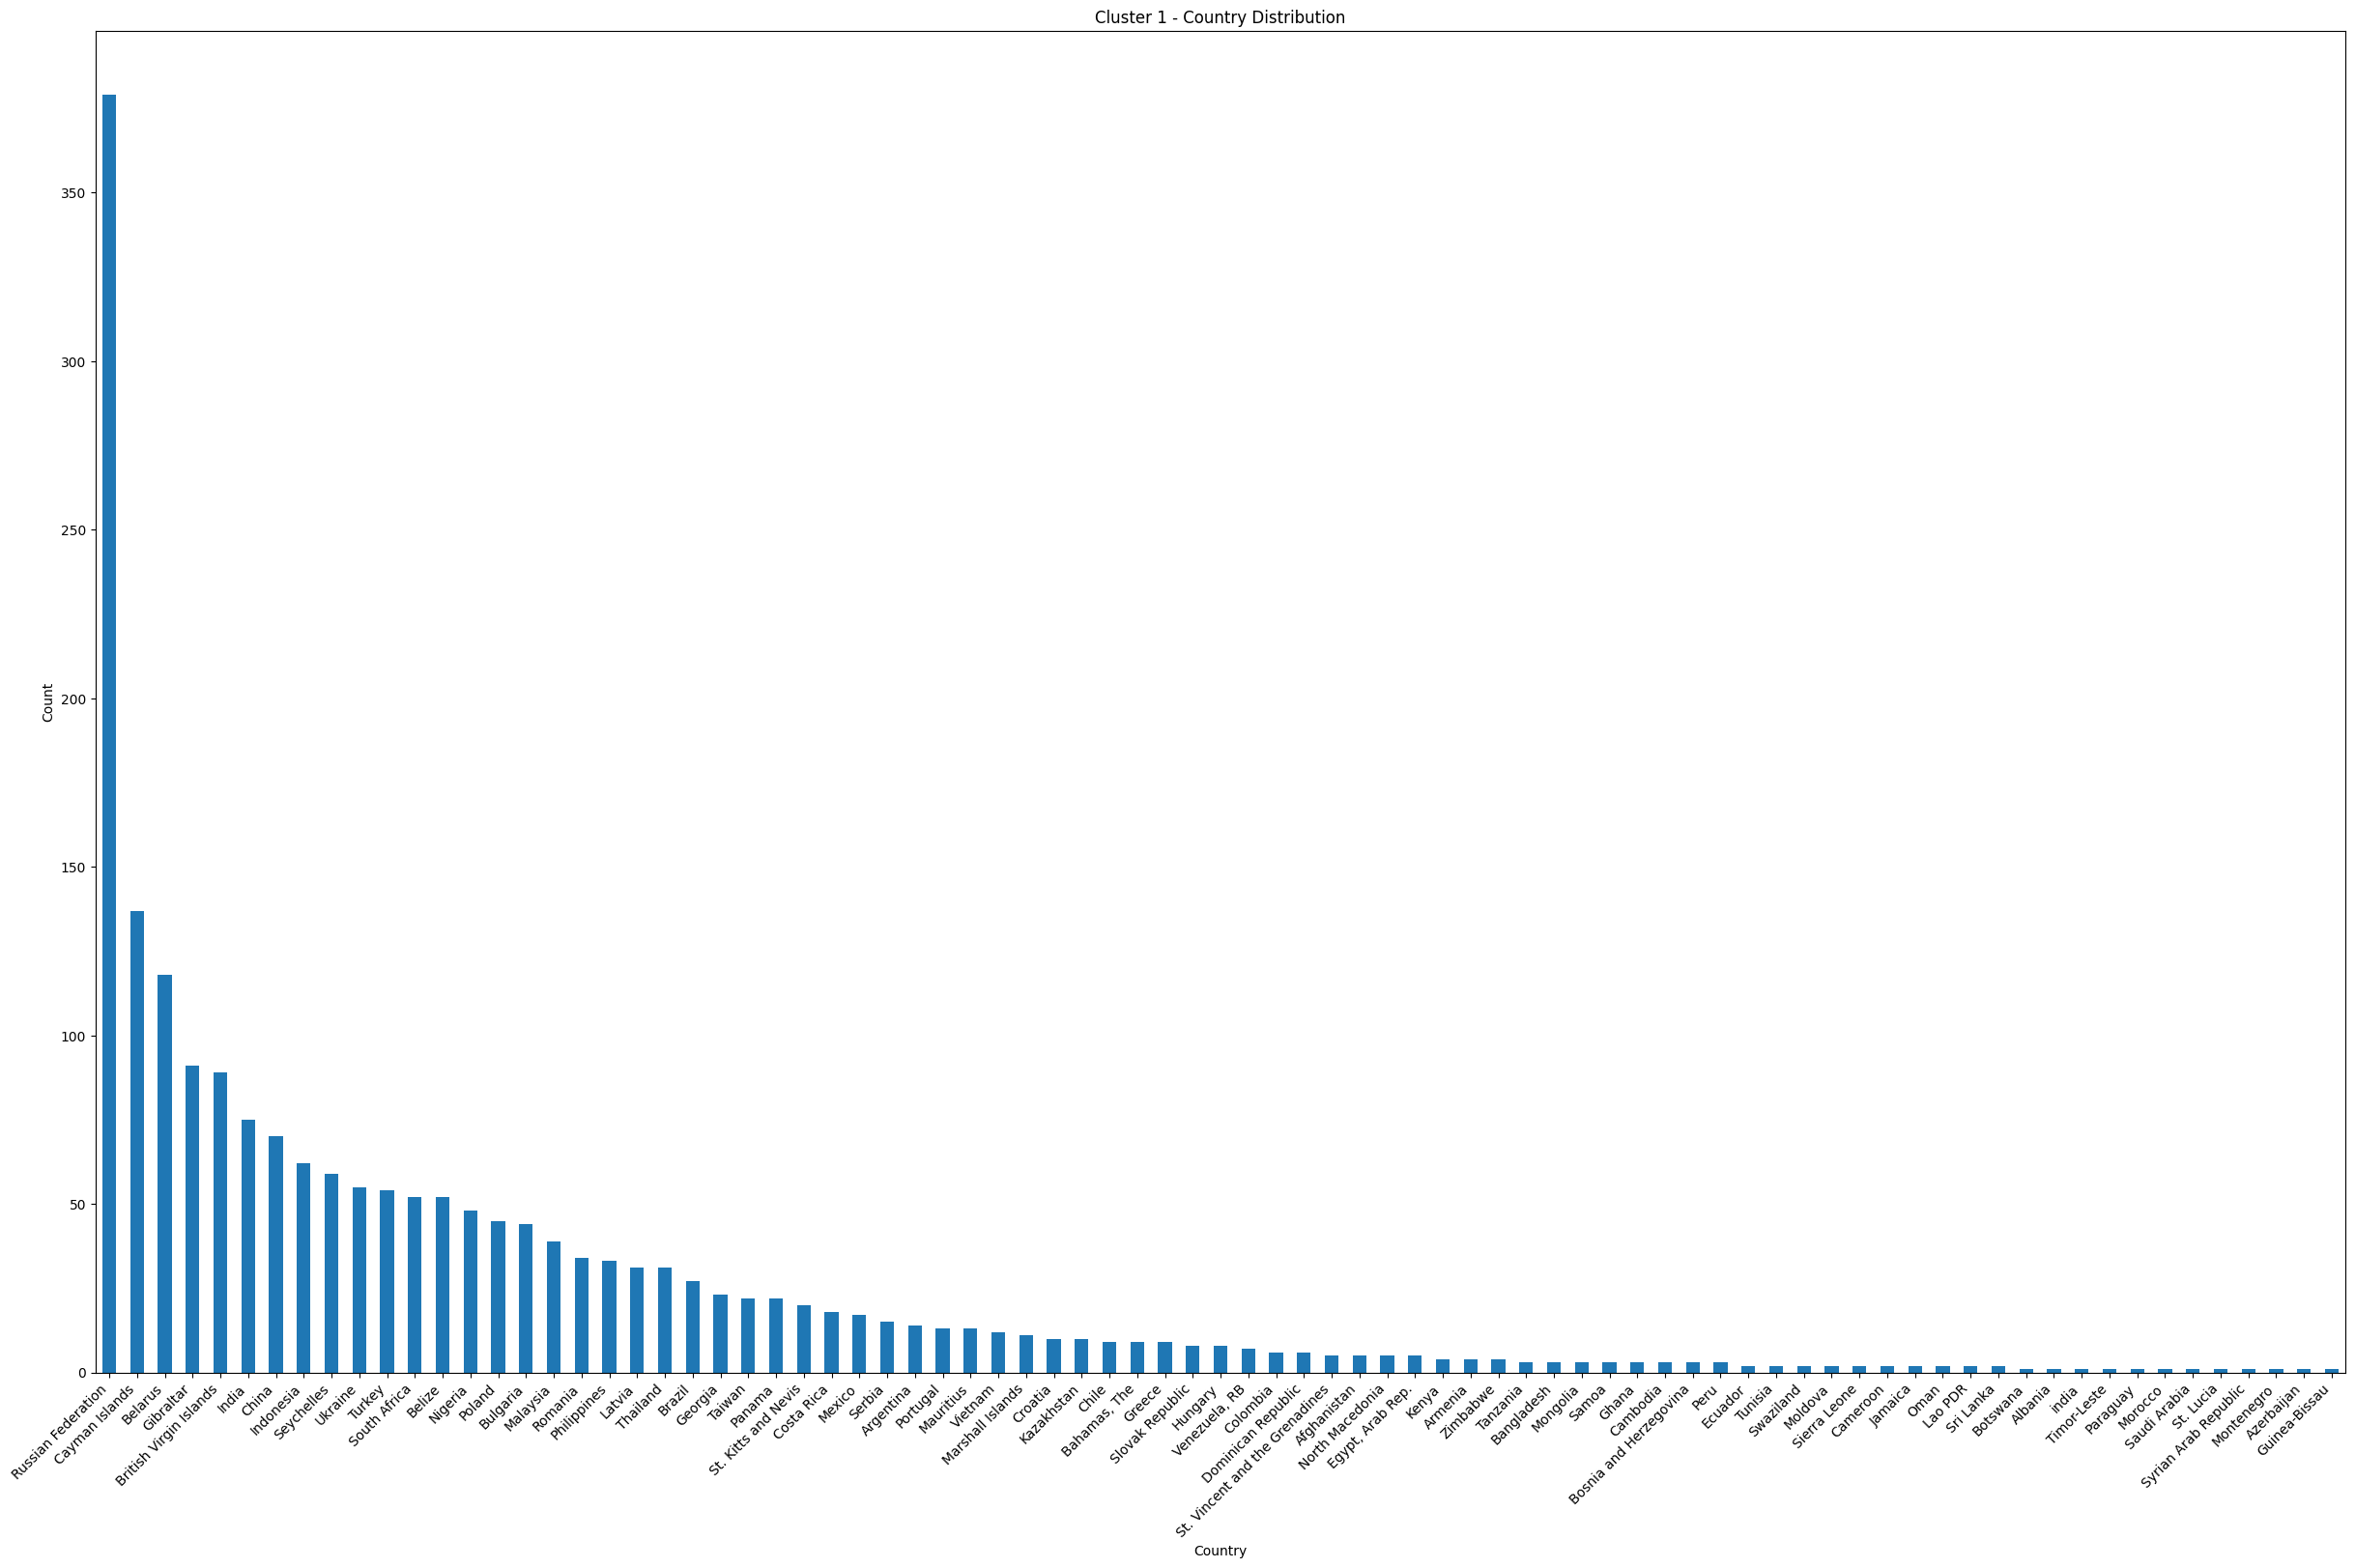

In [34]:
    for cluster in data['Cluster'].unique():
        cluster_data = data[data['Cluster'] == cluster]
        country_counts = cluster_data['Country'].value_counts()

        plt.figure(figsize=(feat_num/2,feat_num/3))
        country_counts.plot(kind='bar')
        plt.title(f"Cluster {cluster} - Country Distribution")
        plt.xlabel("Country")
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        print(f"Cluster {cluster}: {len(country_counts)} unique countries")

plt.show()

### Raised

Agora analisaremos o montante levantado por cluster

Abaixo novamente uma representação mais simplória.

 Em seguida teremos novamente gráficos para representar a soma total levantada e a média levantada por cluster

In [35]:
for cluster in data['Cluster'].unique():
  cluster_data = data[data['Cluster'] == cluster]
  raised_stats = cluster_data['Raised'].describe()
  print(f"\nCluster {cluster} - Raised Statistics:")
  print(raised_stats)


Cluster 2 - Raised Statistics:
count    3620.000000
mean        0.003792
std         0.012324
min         0.000000
25%         0.000000
50%         0.000000
75%         0.001500
max         0.258000
Name: Raised, dtype: float64

Cluster 0 - Raised Statistics:
count    926.000000
mean       0.005051
std        0.020093
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000593
max        0.297528
Name: Raised, dtype: float64

Cluster 1 - Raised Statistics:
count    1995.000000
mean        0.004189
std         0.033138
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000805
max         1.000000
Name: Raised, dtype: float64


Abaixo vemos a soma total por cluster dos valores levantados. Esse valor porém pesa bastante na quantidade de startups por cluster, portanto na sequencia veremos os valores em média.

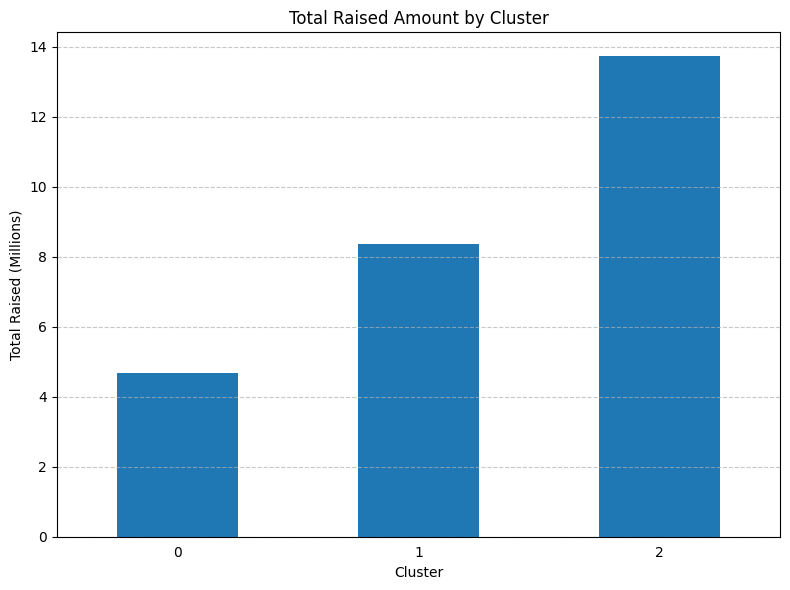

In [36]:
cluster_counts = data.groupby('Cluster')['Raised'].sum()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', colormap='tab10')
plt.title("Total Raised Amount by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Raised (Millions)")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tick_params(bottom=False)  # Hide x-axis tick labels (redundant with x-ticks)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Agora com os valores em média percebemos que mesmo assim a diferença é bastante sutil entre os clusters. É perceptível que essa não deva ser a forma correta de visualizar esse dado, então voltaremos para ele novamente em pouco tempo.

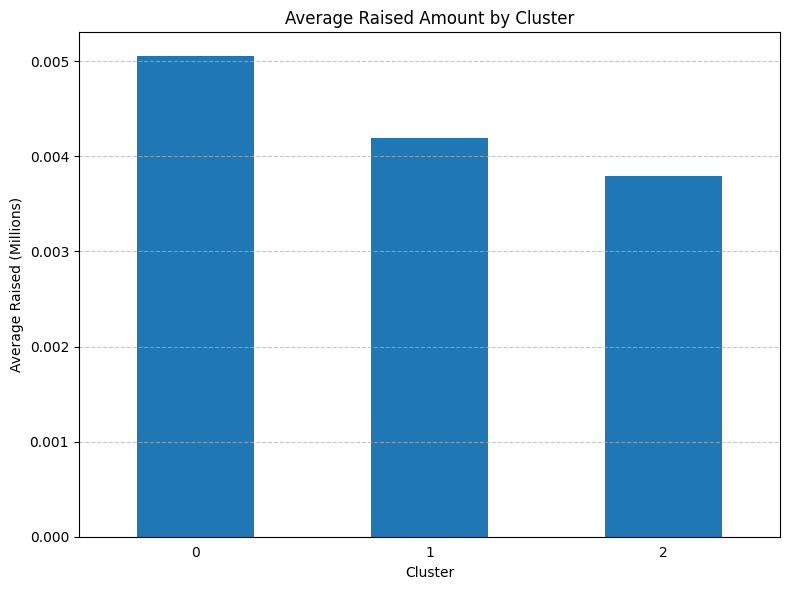

In [37]:
cluster_averages = data.groupby('Cluster')['Raised'].mean()

plt.figure(figsize=(8, 6))
cluster_averages.plot(kind='bar', colormap='tab10')
plt.title("Average Raised Amount by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Raised (Millions)")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tick_params(bottom=False)  # Hide x-axis tick labels (redundant with x-ticks)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### ESG

Agora veremos os dados de Governança ambiental, social e corporativa (ESG) em cada cluster.

Novamente um dos principais atributos do nosso dataset.

Abaixo vemos um gráfico que nos mostra o total somado da pontuação ESG por cluster, mas novamente cai no mesmo caso em que a quantidade de startups por cluster influencia totalmente nos dados.

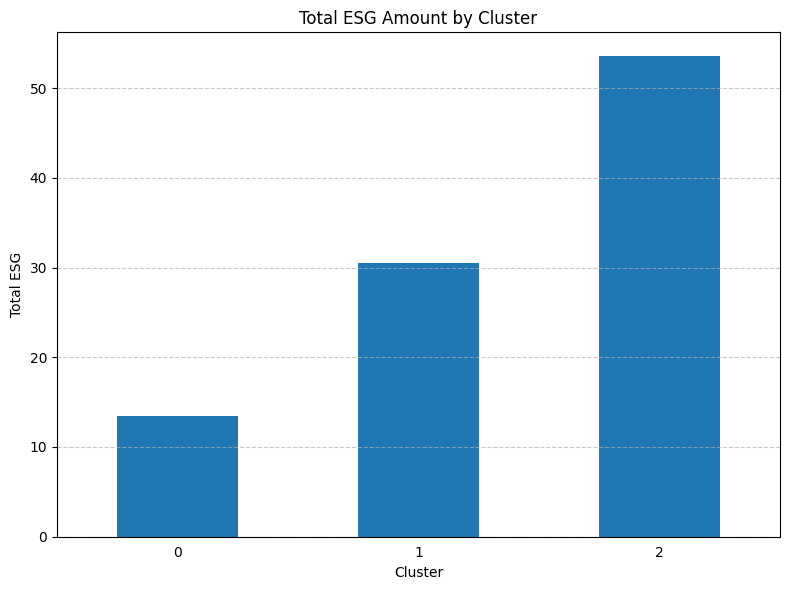

In [38]:
cluster_counts = data.groupby('Cluster')['ESG'].sum()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', colormap='tab10')
plt.title("Total ESG Amount by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total ESG")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tick_params(bottom=False)  # Hide x-axis tick labels (redundant with x-ticks)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

E agora por média chegamos mais uma vez na inconclusão dos dados apresentados, tendo em vista que os dados são extremamente próximos não podemos tirar nenhuma interpretação dos mesmos.

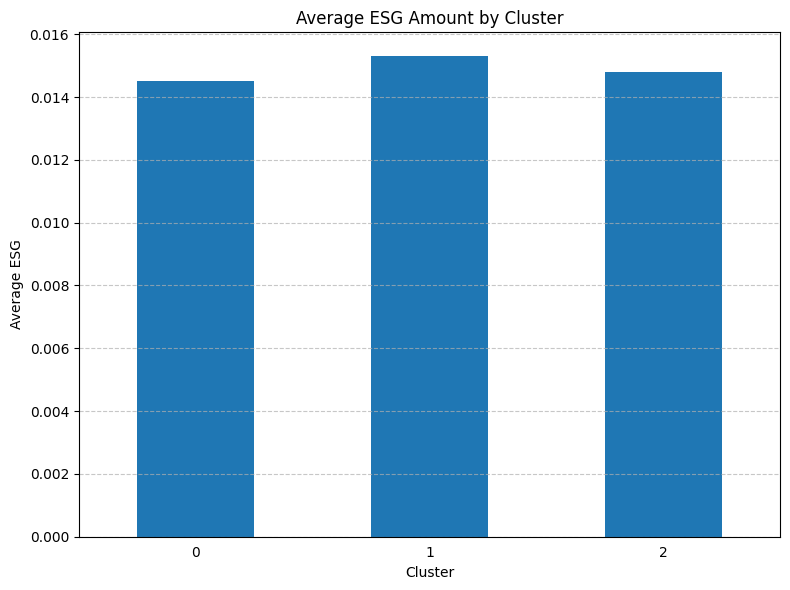

In [39]:
cluster_counts = data.groupby('Cluster')['ESG'].mean()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', colormap='tab10')
plt.title("Average ESG Amount by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average ESG")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tick_params(bottom=False)  # Hide x-axis tick labels (redundant with x-ticks)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Raised vs ESG

Para chegar a conclusões resolvemos fazer uma correlação entre os dois parametros ESG e Raised para no fim ver se conseguimos tirar algum proveito desses dados que são muito significativos.

E como podemos ver abaixo agora sim podemos visualizar diferenças palpáveis entre os dados.

Com isso podemos ver finalmente o que levou a diferenciação entre os clusters 0 e 2.

Com startups inteiramente situadas nos Estados Unidos, o cluster 0 maximizou o valor do levantamento em detrimento do ESG, algo que é esperado vindo de empresas com as políticas dos Estados Unidos

O mesmo padrão de seguir as políticas segue também para o restante, por exemplo no cluster 2 e a sua presença majoritariamente europeia, região essa que valoriza o ESG score de uma forma que os EUA não fazem.

<ipython-input-40-770a01e3fba4>:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



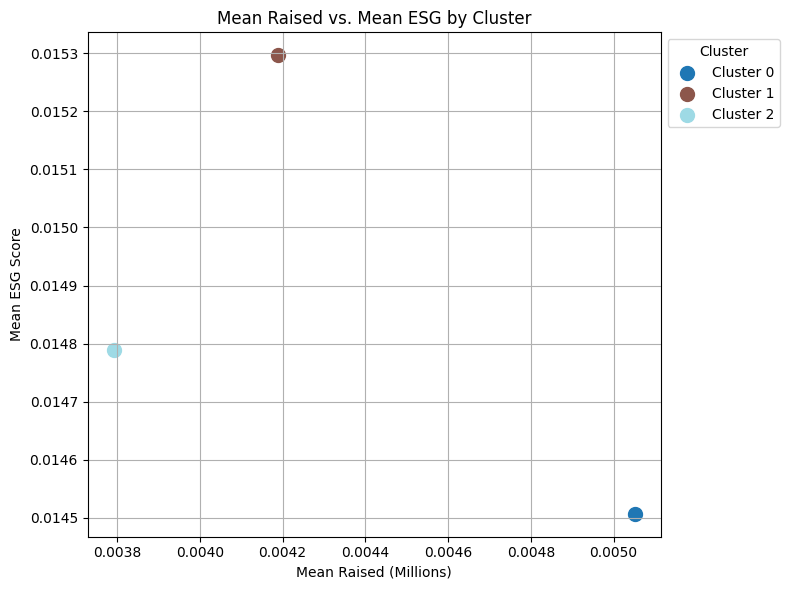

In [40]:
cluster_means = data.groupby('Cluster')[['Raised', 'ESG']].mean()

plt.figure(figsize=(8, 6))

# Use a colormap and assign a unique color for each cluster
cmap = plt.cm.get_cmap('tab20', len(cluster_means))
for idx, row in enumerate(cluster_means.itertuples()):
  plt.scatter(row.Raised, row.ESG, color=cmap(idx), s=100)

legend_labels = [f"Cluster {i}" for i in cluster_means.index.to_list()]
plt.legend(legend_labels, title="Cluster", loc="upper left", bbox_to_anchor=(1, 1))


plt.title("Mean Raised vs. Mean ESG by Cluster")
plt.xlabel("Mean Raised (Millions)")
plt.ylabel("Mean ESG Score")
plt.grid(True)
plt.tight_layout()
plt.show()
